In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import os

In [2]:
files = os.listdir('../data/in')
files.remove('.gitignore')
cities = set([f.split("_")[0] for f in files])

workloads = []

for c in cities:
    city = pd.DataFrame()
    print("loading:",c)
    for f in files:
        if c in f:
            tmp = pd.read_csv(
                f"../data/in/{f}",
                parse_dates=['open_date','close_date'],
            )
            city = pd.concat([city,tmp]).reset_index(drop=True)
    city = time_series_workload(city, city['city'].unique()[0])
    city.to_csv(f"../data/processed/{city['city'].unique()[0]}_workload.csv", index=False)
    workloads.append(city)

loading: buffalo


Calculating the workload...
loading: miami


Calculating the workload...
loading: washington


Calculating the workload...
loading: boston


Calculating the workload...
loading: oakland


Calculating the workload...


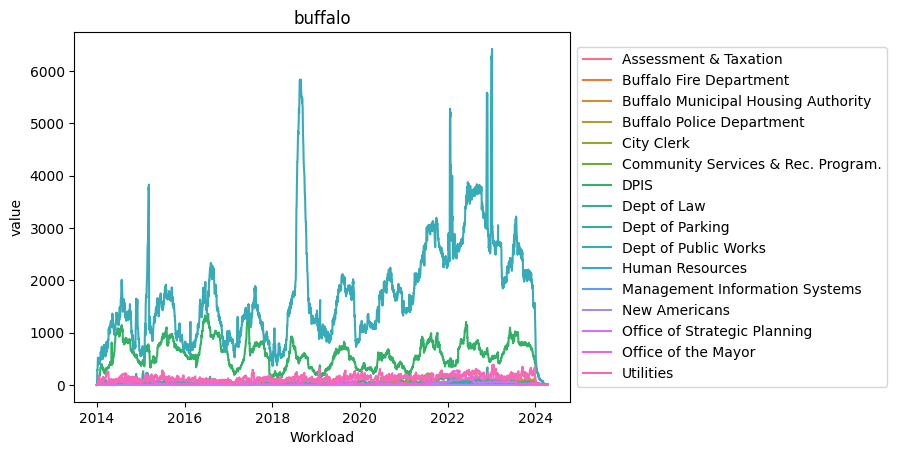

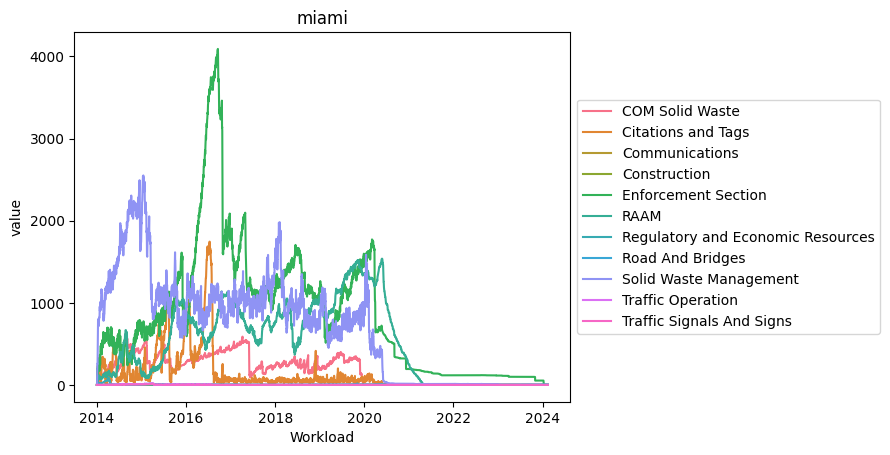

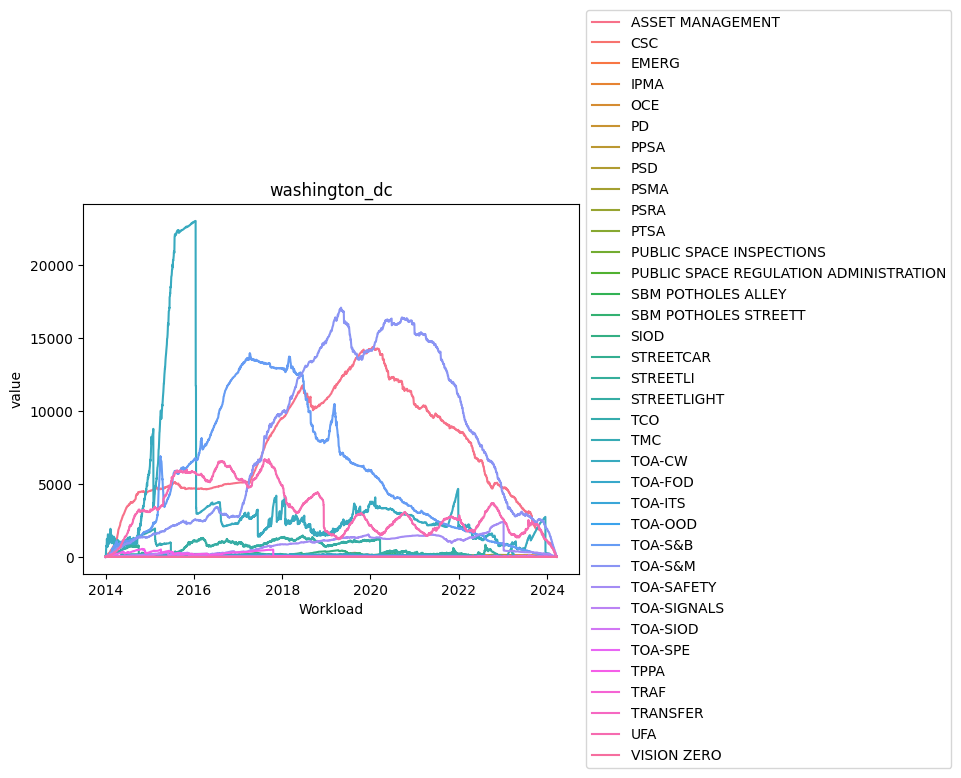

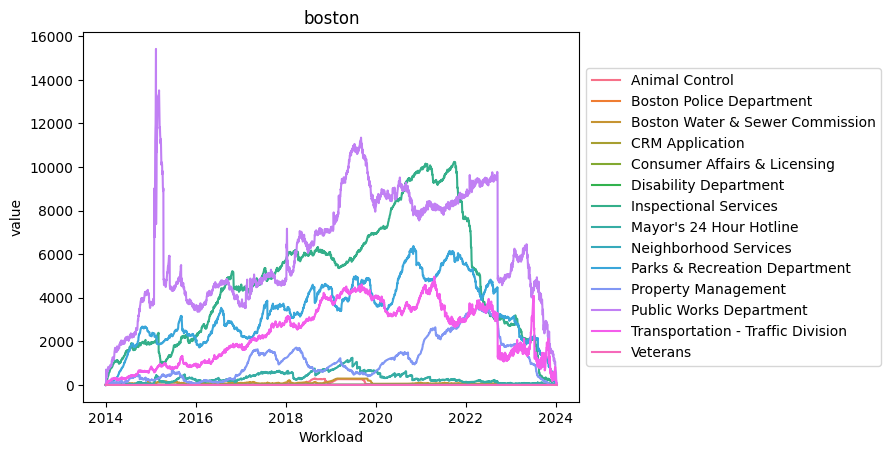

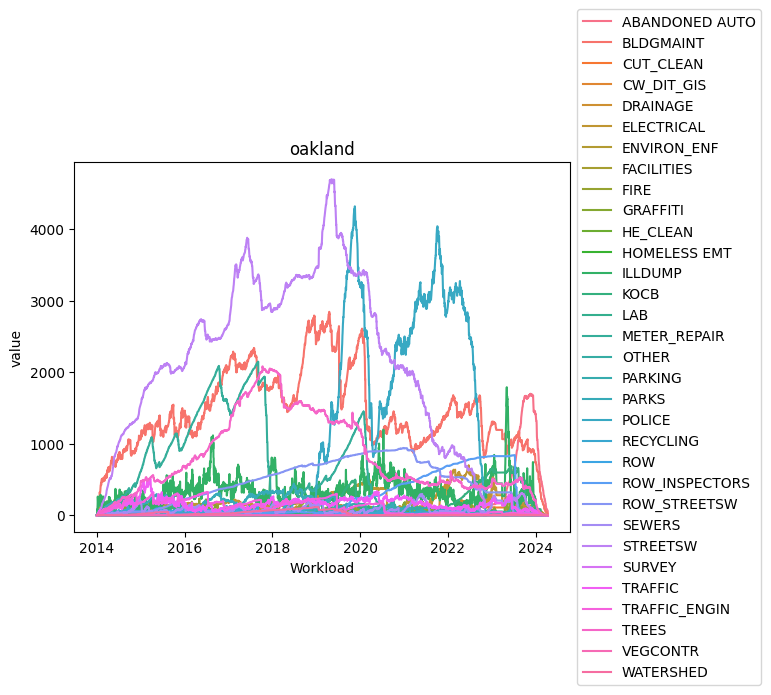

In [6]:
for w in workloads:
    plot = sns.lineplot(data=w, x="date", y="value", hue="label")
    plt.title(w['city'].unique()[0])
    plt.xlabel("Workload")
    plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()